In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

df = pd.read_csv(r'EasyVisa.csv')
print(df.shape)

(25480, 12)


In [2]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
features_with_na

[]

In [3]:
df.duplicated().sum()

0

In [4]:
df.drop('case_id', inplace=True, axis=1)

In [5]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
#Creating a date object of today
from datetime import date
today_date = date.today()
current_year = today_date.year

In [7]:
current_year

2024

In [8]:
df['company_age'] = current_year - df['yr_of_estab']

In [9]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [10]:
df.drop('yr_of_estab', inplace=True, axis=1)

In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("number of numerical feature:", len(num_features))

number of numerical feature: 3


In [12]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print('number of categorical feature:', len(cat_feature))

number of categorical feature: 8


In [13]:
discrete_feature = [feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete features:', len(discrete_feature))

Num of Discrete features: 0


In [14]:
continues_feature = [feature for feature in num_features if feature not in discrete_feature]
print('Num of Continues feature', len(continues_feature))

Num of Continues feature 3


In [15]:
X = df.drop('case_status', axis=1)
y = df['case_status']

In [16]:
#Encode the dipendent varible to numerical
y = np.where(y=='Denied', 1, 0)

In [17]:
y

array([1, 0, 1, ..., 0, 0, 0])

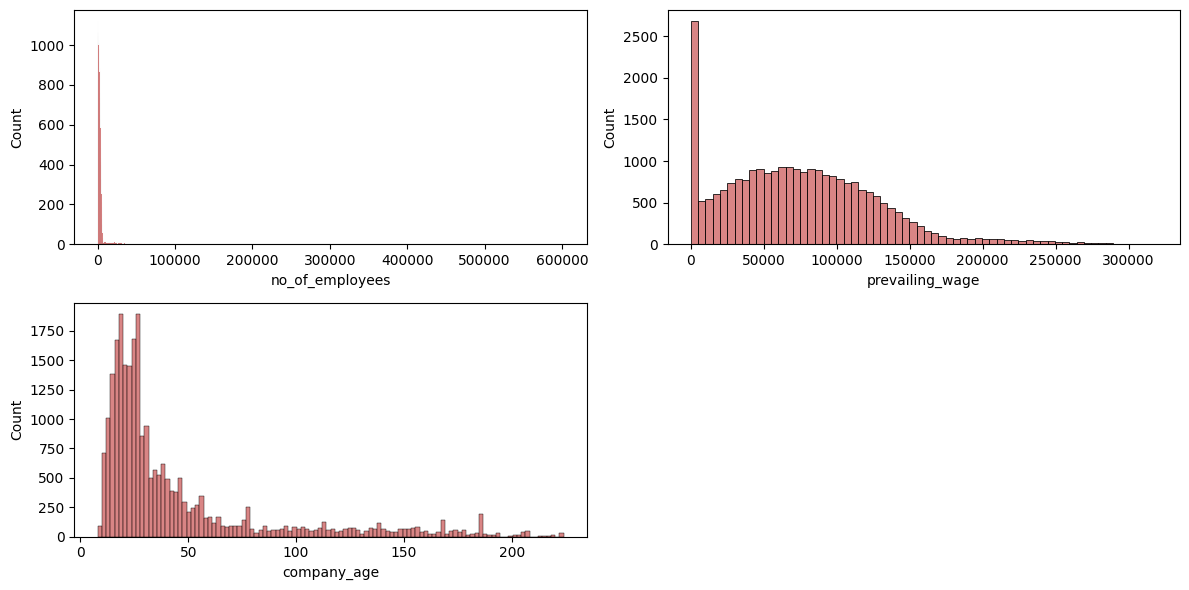

In [18]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees', 'prevailing_wage', 'company_age']):
    plt.subplot(2,2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()


In [19]:
#check skwenes
X[continues_feature].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [20]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_feature = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_feature])

In [21]:
X_copy = pd.DataFrame(X_copy, columns=transform_feature)

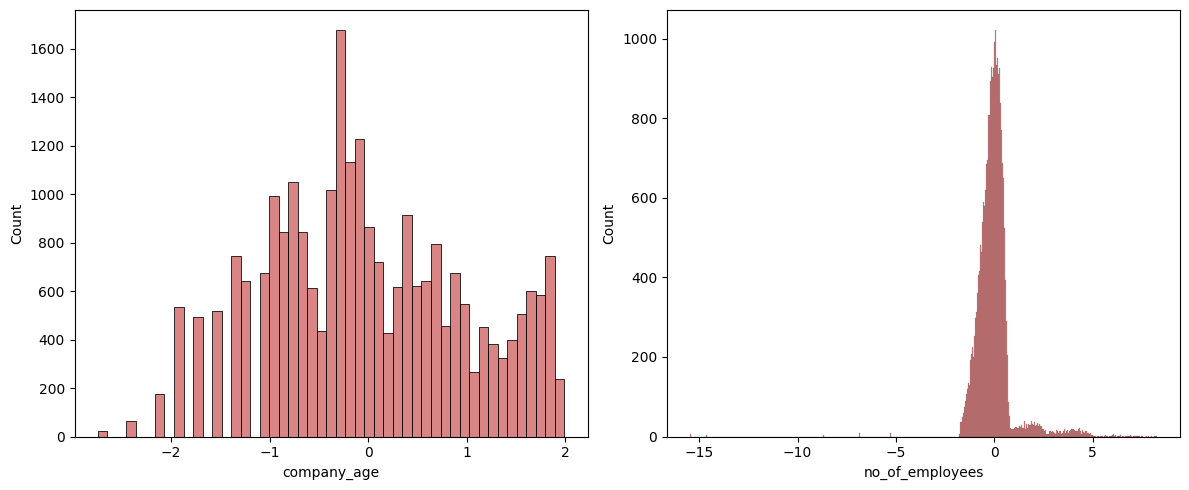

In [22]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_feature):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [23]:
X_copy.skew(axis=0, skipna=True)

company_age        0.103264
no_of_employees    0.399339
dtype: float64

In [24]:
#Create column transform with 3 type of transformer

or_column =  ['has_job_experience', 'requires_job_training', 'full_time_position', 'education_of_employee']
oh_column = ['continent', 'unit_of_wage', 'region_of_employment']
transform_column = ['no_of_employees', 'company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, oh_column),
        ('OrdinalEncoder', ordinal_transformer, or_column),
        ('Transformer', transform_pipe, transform_column),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [25]:
X = preprocessor.fit_transform(X)

In [26]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

In [27]:
from imblearn.combine import SMOTEENN, SMOTETomek
smt = SMOTEENN(random_state=42, sampling_strategy='minority')
X_res, y_res = smt.fit_resample(X, y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((13638, 24), (3410, 24))

In [29]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [30]:
def accuracy_clf(true, predictied):
    acc = accuracy_score(true, predictied)
    f1 = f1_score(true, predictied)
    precision = precision_score(true, predictied)
    recall = recall_score(true, predictied)
    roc_auc = roc_auc_score(true, predictied)
    return acc, f1, precision, recall, roc_auc

In [31]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbours Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

In [32]:
#Create a function which can evalute a model and return a report
def evaluate_model(X, y, models):

    #seperate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models_list = []
    accuracy_list = []
    auc = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) #Train model

        #make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        #Training set prefomance
        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall, model_train_rocouc_score = accuracy_clf(y_train, y_train_pred)

        #Test set perfomance
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = accuracy_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model Perfomance for training set')
        print('- Accuracy: {:.4f}'.format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision score: {:.4f}'.format(model_train_precision))
        print('- Recall Score: {:.4f}'.format(model_train_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_train_rocouc_score))

        print('-------------------------------------------------------')

        print('Model Perfomance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision score: {:.4f}'.format(model_test_precision))
        print('- Recall Score: {:.4f}'.format(model_test_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

    return report



In [33]:
base_model_report = evaluate_model(X=X_res, y=y_res, models=models)

Random Forest
Model Perfomance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision score: 1.0000
- Recall Score: 1.0000
- ROC AUC Score: 1.0000
-------------------------------------------------------
Model Perfomance for Test set
- Accuracy: 0.9551
- F1 score: 0.9587
- Precision score: 0.9569
- Recall Score: 0.9605
- ROC AUC Score: 0.9546


Decision Tree
Model Perfomance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision score: 1.0000
- Recall Score: 1.0000
- ROC AUC Score: 1.0000
-------------------------------------------------------
Model Perfomance for Test set
- Accuracy: 0.9293
- F1 score: 0.9350
- Precision score: 0.9327
- Recall Score: 0.9373
- ROC AUC Score: 0.9286


Gradient Boosting
Model Perfomance for training set
- Accuracy: 0.8822
- F1 score: 0.8903
- Precision score: 0.8945
- Recall Score: 0.8862
- ROC AUC Score: 0.8819
-------------------------------------------------------
Model Perfomance for Test set
- Accuracy: 0.8956
- F1 score: 0.90

In [34]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.955132
4,K-Neighbours Classifier,0.940176
5,XGBClassifier,0.935191
6,CatBoostClassifier,0.929619
1,Decision Tree,0.929326
2,Gradient Boosting,0.895601
8,AdaBoostClassifier,0.870381
7,Support Vector Classifier,0.870088
3,Logistic Regression,0.745161


In [35]:
# Define hyperparameter grids
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 12, None, 15, 20],
    'max_features': ['sqrt', 'log2', None],

}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [36]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('RF', RandomForestClassifier(), rf_params),
    ('KNN', KNeighborsClassifier(), knn_params)
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=5,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_res, y_res)
    model_params[name] = random.best_params_

for model_name in model_params: 
    print(f'------------- Best Params for {model_name} ---------------------')
    print(model_params[model_name])

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
------------- Best Params for RF ---------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
------------- Best Params for KNN ---------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [38]:
model_params

{'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_params['RF']),
    "KNeighbors Classifier": KNeighborsClassifier(**model_params['KNN'])
}
tuned_report = evaluate_model(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model Perfomance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision score: 1.0000
- Recall Score: 1.0000
- ROC AUC Score: 1.0000
-------------------------------------------------------
Model Perfomance for Test set
- Accuracy: 0.9569
- F1 score: 0.9603
- Precision score: 0.9585
- Recall Score: 0.9621
- ROC AUC Score: 0.9564


KNeighbors Classifier
Model Perfomance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision score: 1.0000
- Recall Score: 1.0000
- ROC AUC Score: 1.0000
-------------------------------------------------------
Model Perfomance for Test set
- Accuracy: 0.9733
- F1 score: 0.9757
- Precision score: 0.9651
- Recall Score: 0.9865
- ROC AUC Score: 0.9721




In [40]:
tuned_report

,Model Name,Accuracy
1,KNeighbors Classifier,0.973314
0,Random Forest Classifier,0.956891


In [41]:
best_model = KNeighborsClassifier(**model_params['KNN'])
best_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print('FINAL MODEL "KNN"')
print('Accuracy score value: {:.4f}'.format(score))
print(cr)

FINAL MODEL "KNN"
Accuracy score value: 0.9733
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1561
           1       0.97      0.99      0.98      1849

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



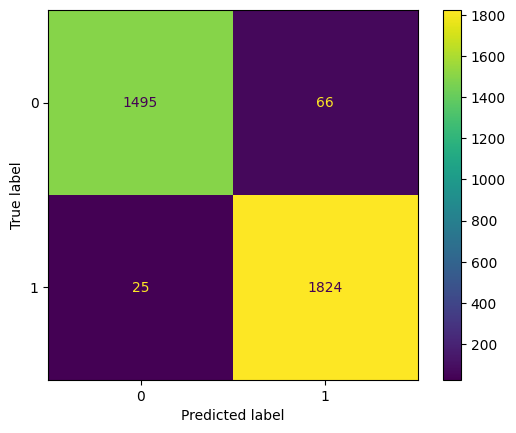

In [42]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)